In [6]:
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
train = pd.read_csv(r'/home/long/longdata/nlp/NLP/train_balanced_new.csv')
test = pd.read_csv(r'/home/long/longdata/nlp/NLP/vectorized_test.csv')

In [8]:
X_train = train.drop(['label'], axis=1)
y_train = train['label']
X_test = test.drop(['label'], axis=1)
y_test = test['label']

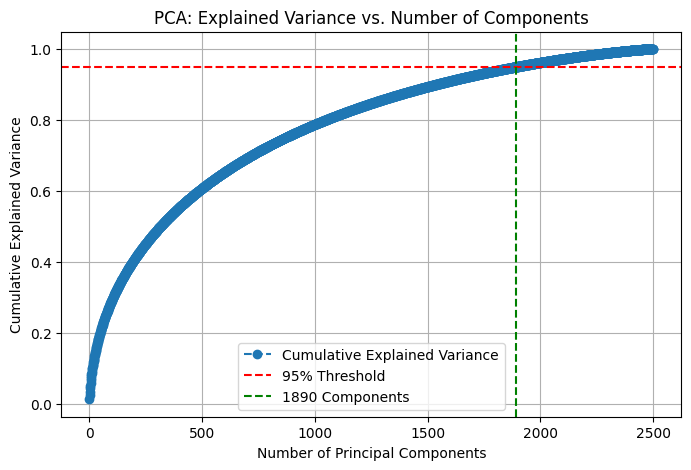

Number of components needed to retain 95% variance: 1890


In [9]:
pca = PCA()
pca.fit(X_train)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label="Cumulative Explained Variance")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Threshold")
plt.axvline(x=num_components, color='g', linestyle='--', label=f"{num_components} Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Explained Variance vs. Number of Components")
plt.legend()
plt.grid()
plt.show()
print(f"Number of components needed to retain 95% variance: {num_components}")

In [10]:
pca = PCA(n_components=num_components) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [11]:
svm = SVC()
param_grid = {
    'C': [0.1, 1],  
    'kernel': ['linear', 'rbf'], 
    'gamma': [0.01, 0.001]  
}
grid_search = GridSearchCV(
    estimator=svm, 
    param_grid=param_grid, 
    cv=2,  
    scoring='accuracy',  
    verbose=2,
    n_jobs=-1  
)
grid_search.fit(X_train_pca, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=37.6min
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=37.9min
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=45.2min
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=45.5min
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=65.4min
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=66.3min
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=70.7min
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=70.9min
[CV] END .......................C=1, gamma=0.01, kernel=rbf; total time=113.7min
[CV] END .......................C=1, gamma=0.01, kernel=rbf; total time=119.3min
[CV] END ....................C=0.1, gamma=0.001, kernel=rbf; total time=150.7min
[CV] END .....................C=0.1, gamma=0.01, 

In [12]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9166815555952593
Balanced Accuracy: 0.8991295806757631
Classification Report:
                  precision    recall  f1-score   support

Chinh tri Xa hoi       0.87      0.88      0.88      7567
        Doi song       0.75      0.72      0.74      2036
        Khoa hoc       0.80      0.83      0.82      2096
      Kinh doanh       0.92      0.90      0.91      5276
       Phap luat       0.91      0.92      0.91      3788
        Suc khoe       0.92      0.94      0.93      5417
        The gioi       0.96      0.93      0.94      6716
        The thao       0.98      0.98      0.98      6667
         Van hoa       0.93      0.94      0.93      6250
         Vi tinh       0.93      0.95      0.94      4560

        accuracy                           0.92     50373
       macro avg       0.90      0.90      0.90     50373
    weighted avg       0.92      0.92      0.92     50373



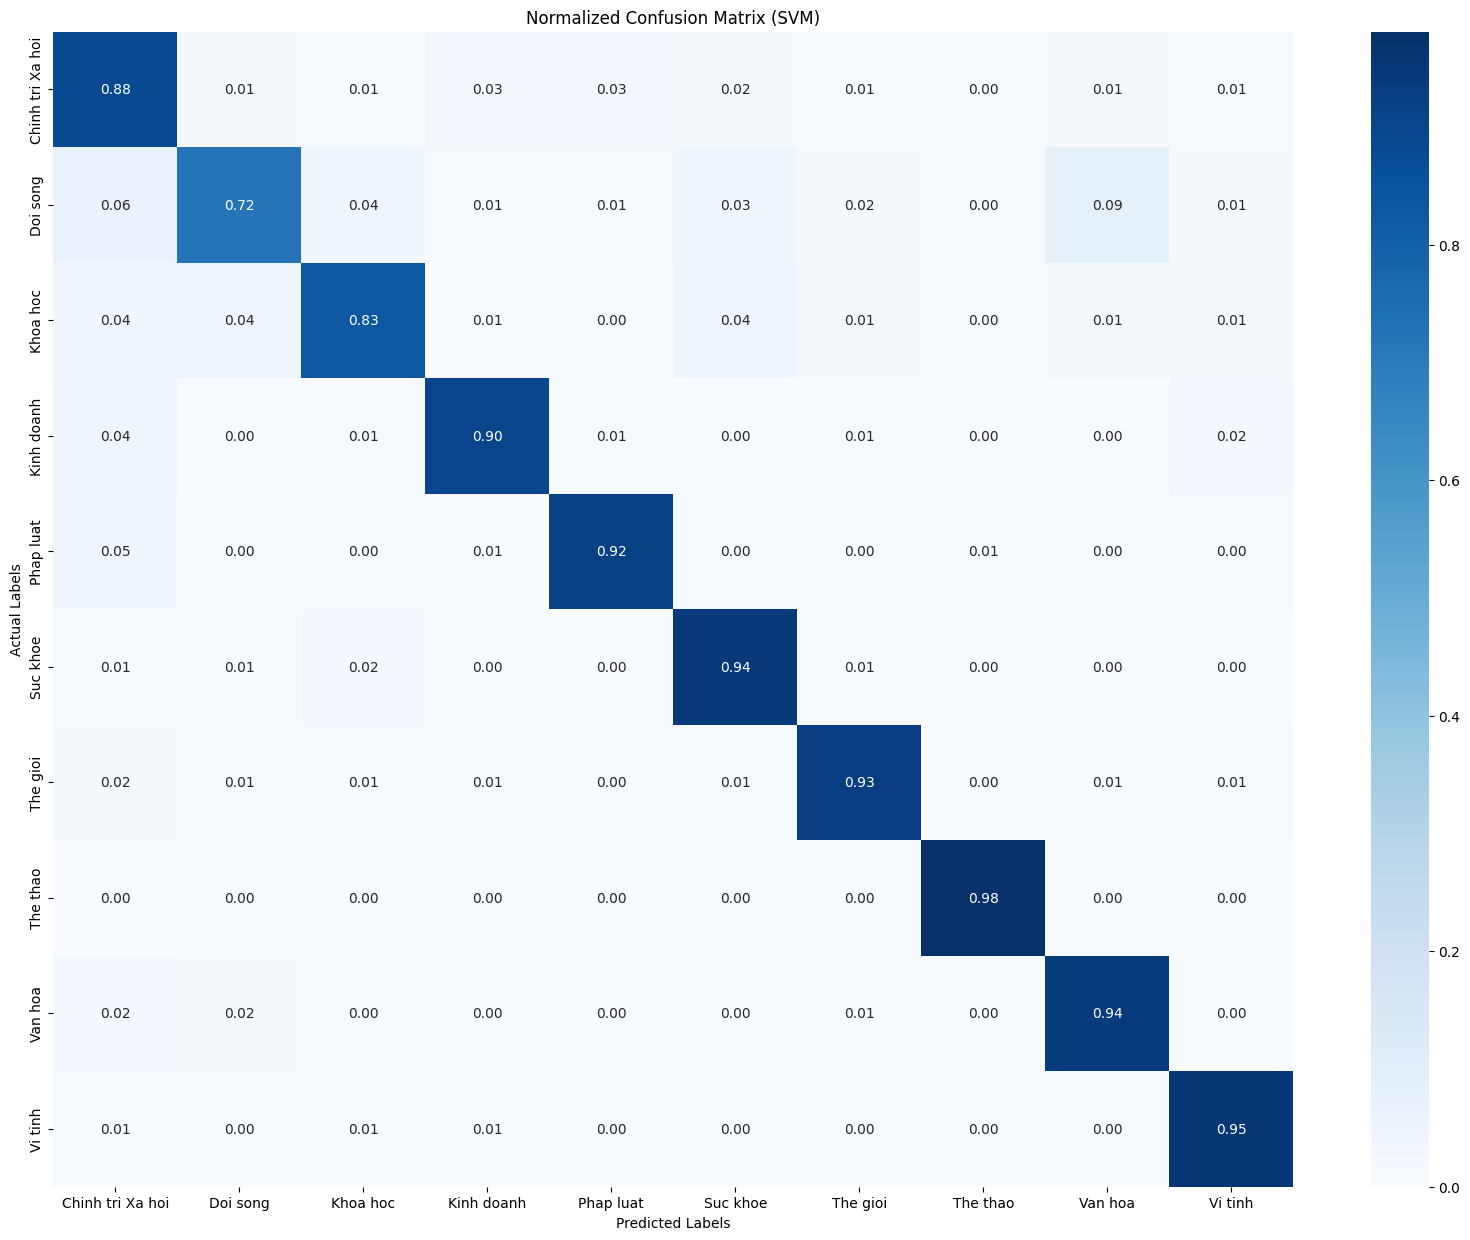

In [14]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
def normalize_confusion_matrix(cm, norm='true'):
    if norm == 'true':
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    elif norm == 'pred':
        cm_normalized = cm.astype('float') / cm.sum(axis=0)[np.newaxis, :]
    elif norm == 'all':
        cm_normalized = cm.astype('float') / cm.sum()
    else:
        raise ValueError("Unknown normalization type. Use 'true', 'pred', or 'all'.")
    return cm_normalized

class_labels = np.unique(y_test)

plt.figure(figsize=(20, 15))
sns.heatmap(
    normalize_confusion_matrix(cm, norm='true'), 
    annot=True, fmt=".2f", cmap='Blues', 
    xticklabels=class_labels, 
    yticklabels=class_labels
)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Normalized Confusion Matrix (SVM)')
plt.show()

In [3]:
!nvidia-smi

Wed Mar 26 18:27:13 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.230.02             Driver Version: 535.230.02   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060        On  | 00000000:02:00.0 Off |                  N/A |
|  0%   40C    P8              10W / 170W |  10687MiB / 12288MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--